In [1]:
%matplotlib inline

#Importacion y Exploracion de datos

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 #Carga del dataset
#
df = pd.read_csv('C:/Users/nicolás/Desktop/CreditCardData.csv')

 # eploramos los datos
print("Tamaño del dataset:", df.shape)
print("Columnas:\n", df.columns)
print("\nPrimeras filas:")
print(df.head())



Tamaño del dataset: (100000, 16)
Columnas:
 Index(['Transaction ID', 'Date', 'Day of Week', 'Time', 'Type of Card',
       'Entry Mode', 'Amount', 'Type of Transaction', 'Merchant Group',
       'Country of Transaction', 'Shipping Address', 'Country of Residence',
       'Gender', 'Age', 'Bank', 'Fraud'],
      dtype='object')

Primeras filas:
  Transaction ID       Date Day of Week  Time Type of Card Entry Mode Amount  \
0      #3577 209  14-Oct-20   Wednesday    19         Visa        Tap     £5   
1      #3039 221  14-Oct-20   Wednesday    17   MasterCard        PIN   £288   
2      #2694 780  14-Oct-20   Wednesday    14         Visa        Tap     £5   
3      #2640 960  13-Oct-20     Tuesday    14         Visa        Tap    £28   
4      #2771 031  13-Oct-20     Tuesday    23         Visa        CVC    £91   

  Type of Transaction Merchant Group Country of Transaction Shipping Address  \
0                 POS  Entertainment         United Kingdom   United Kingdom   
1            

## Ver columnas y su Dtype(EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

# Quitar simbolo libra a la columna Amount y quitar el # a la columna Transaction ID

In [4]:

df['Amount'] = df['Amount'].replace('[£,]', '', regex=True).astype(float)


In [5]:
df['Transaction ID'] = df['Transaction ID'].str.replace('#', '', regex=False)
df['Transaction ID'] = df['Transaction ID'].str.replace(' ', '', regex=False)
df['Transaction ID'] = df['Transaction ID'].astype(int)

# Ver dtype de transaction

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  int32  
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   float64
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [7]:
df.head(10)

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
5,3446698,13-Oct-20,Tuesday,20,MasterCard,Tap,30.0,POS,Children,India,India,India,M,48.4,Monzo,0
6,3652191,13-Oct-20,Tuesday,18,Visa,CVC,231.0,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,3161927,13-Oct-20,Tuesday,18,MasterCard,CVC,154.0,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
8,3025809,13-Oct-20,Tuesday,23,MasterCard,PIN,39.0,ATM,Fashion,Russia,Russia,United Kingdom,F,43.3,Metro,0
9,3413696,14-Oct-20,Wednesday,23,MasterCard,Tap,17.0,POS,Entertainment,India,India,India,M,69.9,Barlcays,0


# Ver si alguna columna tiene valores nulos

In [8]:
# valores de si hay valores nulos
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()


¿Hay valores faltantes en la base de datos? True
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                     True
Type of Transaction       False
Merchant Group             True
Country of Transaction    False
Shipping Address           True
Country of Residence      False
Gender                     True
Age                       False
Bank                      False
Fraud                     False
dtype: bool


# Aplicar nan a celdas sin valor 

In [9]:
col_nulos= df.columns[df.isnull().any()]

# Aplicar imputación:

for col in col_nulos:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(np.nan)
    else:
        df[col] = df[col].fillna(0)

# Verificar que ya no haya valores nulos en columnas numéricas
rectificar = df[col_nulos].isnull().sum()

In [10]:
rectificar

Amount               0
Merchant Group      10
Shipping Address     5
Gender               4
dtype: int64

# Verificar si queda otra columna con valores nulos

In [11]:
# valores de si hay valores nulos
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()

¿Hay valores faltantes en la base de datos? True
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                    False
Type of Transaction       False
Merchant Group             True
Country of Transaction    False
Shipping Address           True
Country of Residence      False
Gender                     True
Age                       False
Bank                      False
Fraud                     False
dtype: bool


# realizar un remplazamos NaN con Missing

In [12]:
df['Merchant Group'].fillna('Missing', inplace=True)
df['Shipping Address'].fillna('Missing', inplace=True)
df['Gender'].fillna('Missing', inplace=True)

C:\Users\nicolás\AppData\Local\Temp\ipykernel_8904\3507343748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Merchant Group'].fillna('Missing', inplace=True)
C:\Users\nicolás\AppData\Local\Temp\ipykernel_8904\3507343748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

# Rectificamos

In [13]:
# valores de si hay valores nulos
tiene_valores_faltantes = df.isnull().any().any()
print(f"¿Hay valores faltantes en la base de datos? {tiene_valores_faltantes}")
valores_faltantes_por_columna = df.isnull().any()
print(valores_faltantes_por_columna)
matriz_valores_faltantes = df.isnull()

¿Hay valores faltantes en la base de datos? False
Transaction ID            False
Date                      False
Day of Week               False
Time                      False
Type of Card              False
Entry Mode                False
Amount                    False
Type of Transaction       False
Merchant Group            False
Country of Transaction    False
Shipping Address          False
Country of Residence      False
Gender                    False
Age                       False
Bank                      False
Fraud                     False
dtype: bool


In [14]:
df.describe()

,Transaction ID,Time,Amount,Age,Fraud
count,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000
mean,3.117139e+06,14.562870,112.57176,44.993770,0.071950
std,3.296291e+05,5.308195,123.43327,9.948494,0.258406
min,2.546884e+06,0.000000,0.00000,15.000000,0.000000
25%,2.830516e+06,10.000000,17.00000,38.200000,0.000000
50%,3.118534e+06,15.000000,30.00000,44.900000,0.000000
75%,3.402841e+06,19.000000,208.00000,51.700000,0.000000
max,3.687455e+06,24.000000,400.00000,86.100000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  int32  
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  100000 non-null  float64
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          100000 non-null  object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        100000 non-null  object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  100000 non-null  object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [16]:
#numericas = ["Time", "Amount", "Age", "Fraud"]

# Vamos a graficar cada columna para entenderla mejor :3
#or col in numericas:
#   plt.figure(figsize=(8, 4))
#    sns.histplot(df[col], kde=False, bins=30)
 #   plt.title(f'Distribución de: {col}')
#   plt.xlabel(col)
#    plt.ylabel('Frecuencia')
#    plt.tight_layout()
#    plt.show()

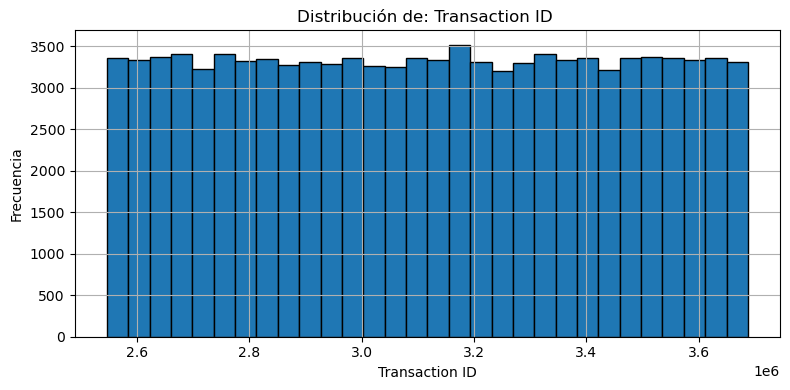

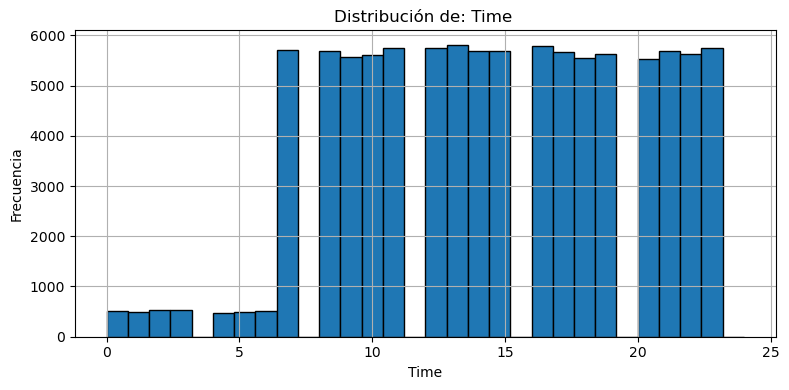

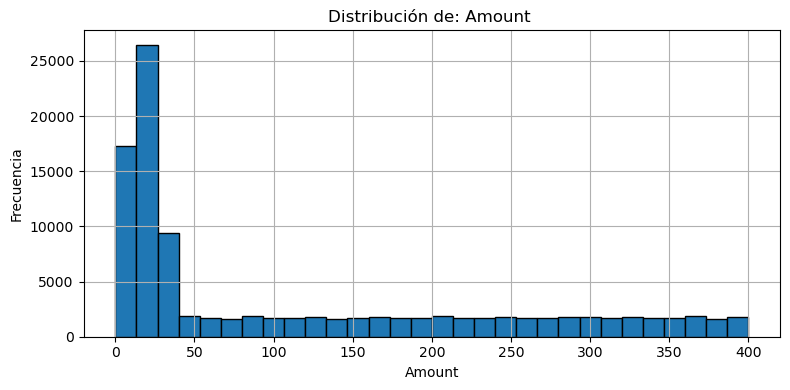

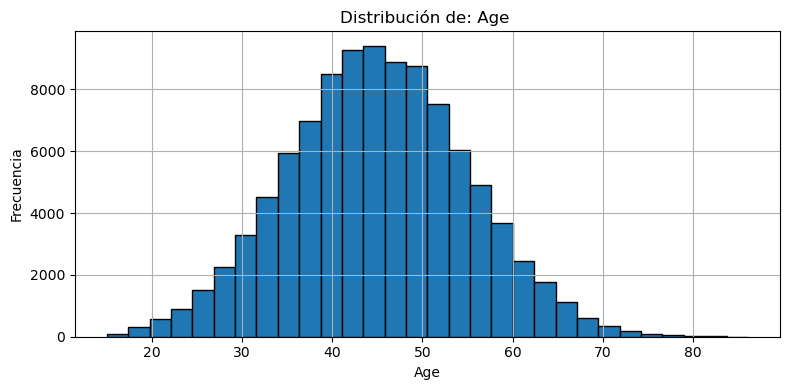

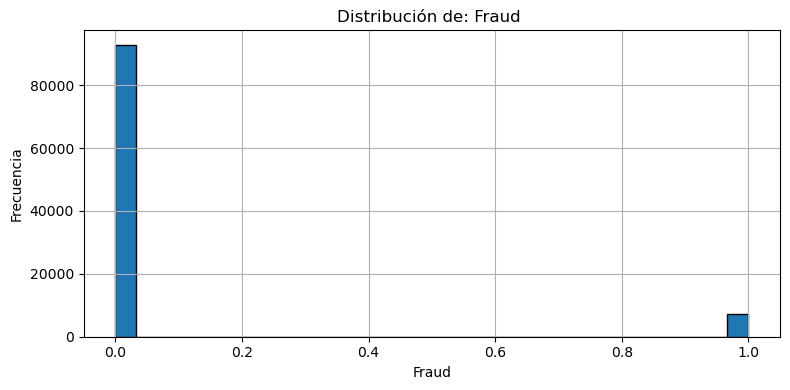

In [17]:
# Tomar una muestra aleatoria de 10.000 filas pq vscode no se la puede con 100.000 filas
#df_sample = df.sample(n=50000, random_state=42)

# Luego graficar
for col in ["Transaction ID","Time", "Amount", "Age", "Fraud"]:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f'Distribución de: {col} ')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [18]:
df_categoricas = df.select_dtypes(include=['object'])

# Verificar el nuevo DataFrame
print("Columnas categóricas seleccionadas:")
print(df_categoricas.columns)



Columnas categóricas seleccionadas:
Index(['Date', 'Day of Week', 'Type of Card', 'Entry Mode',
       'Type of Transaction', 'Merchant Group', 'Country of Transaction',
       'Shipping Address', 'Country of Residence', 'Gender', 'Bank'],
      dtype='object')


In [19]:
# Mostrar las primeras filas
df_categoricas.head()

,Date,Day of Week,Type of Card,Entry Mode,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Bank
0,14-Oct-20,Wednesday,Visa,Tap,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,RBS
1,14-Oct-20,Wednesday,MasterCard,PIN,POS,Services,USA,USA,USA,F,Lloyds
2,14-Oct-20,Wednesday,Visa,Tap,POS,Restaurant,India,India,India,F,Barclays
3,13-Oct-20,Tuesday,Visa,Tap,POS,Entertainment,United Kingdom,India,United Kingdom,F,Barclays
4,13-Oct-20,Tuesday,Visa,CVC,Online,Electronics,USA,USA,United Kingdom,M,Halifax


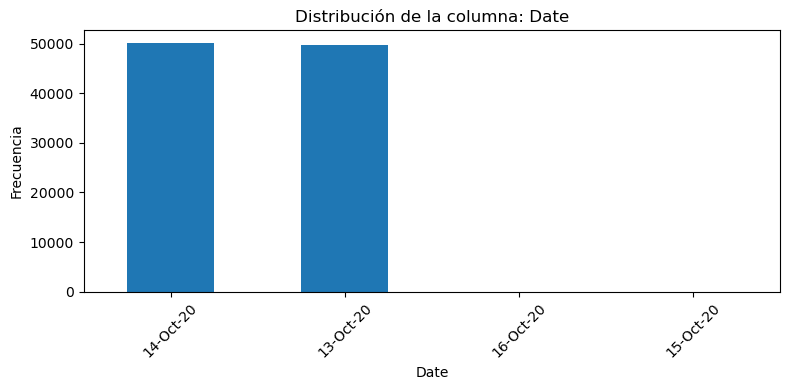

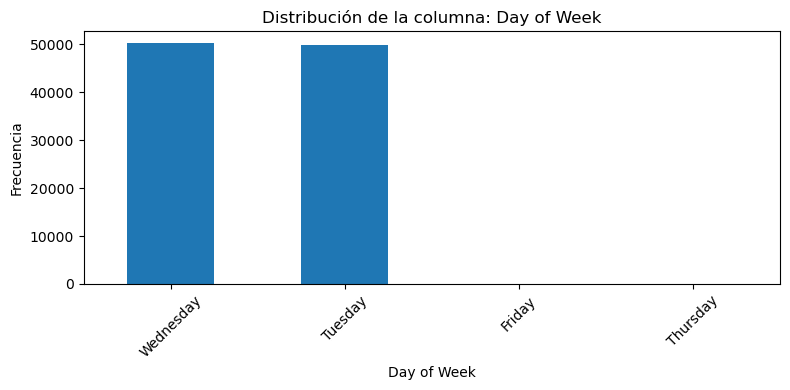

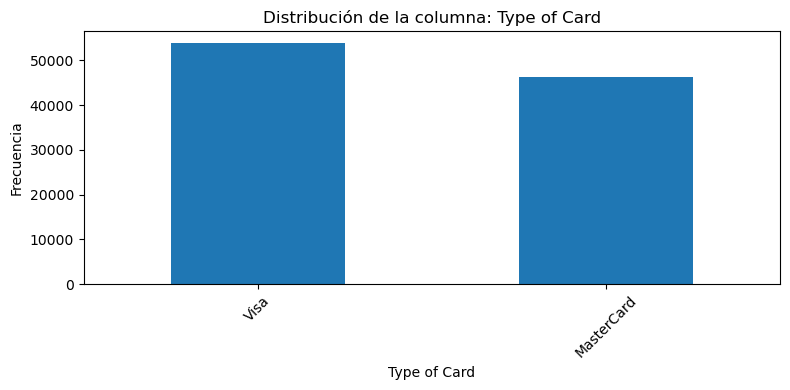

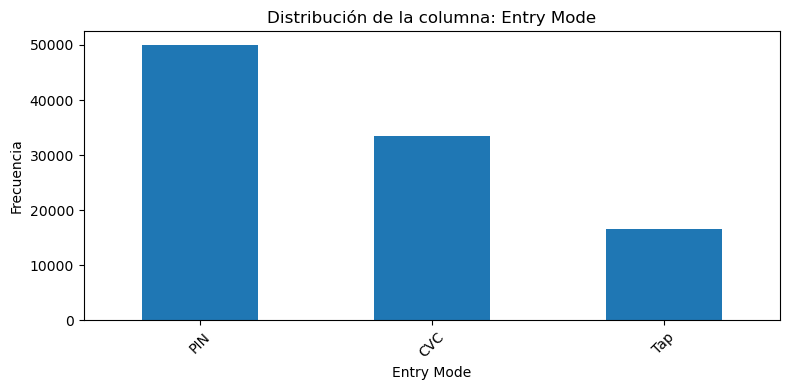

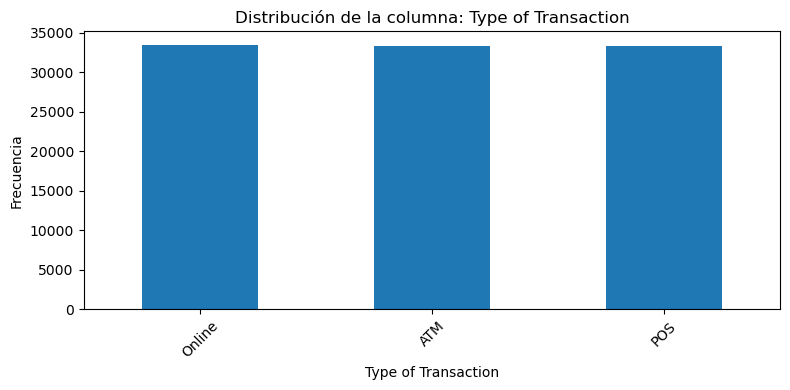

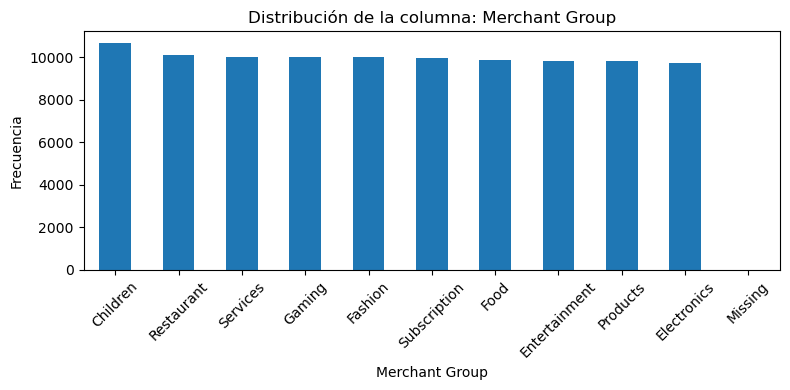

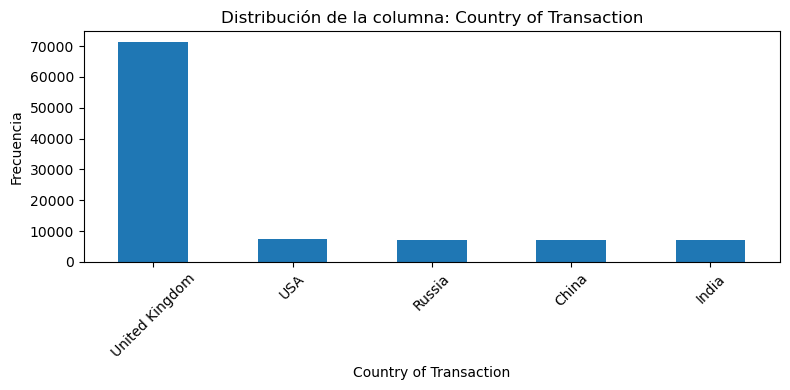

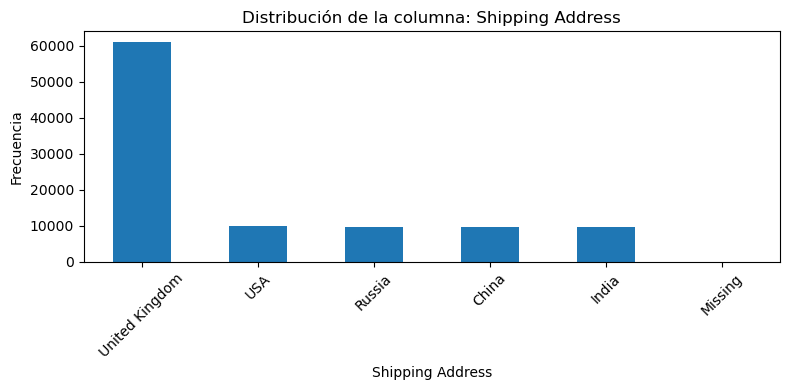

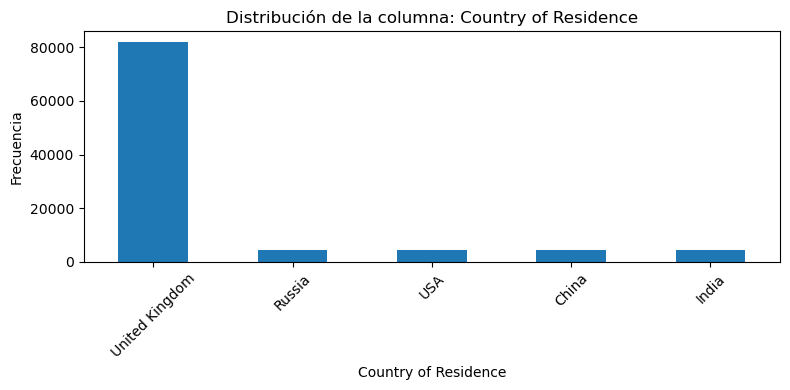

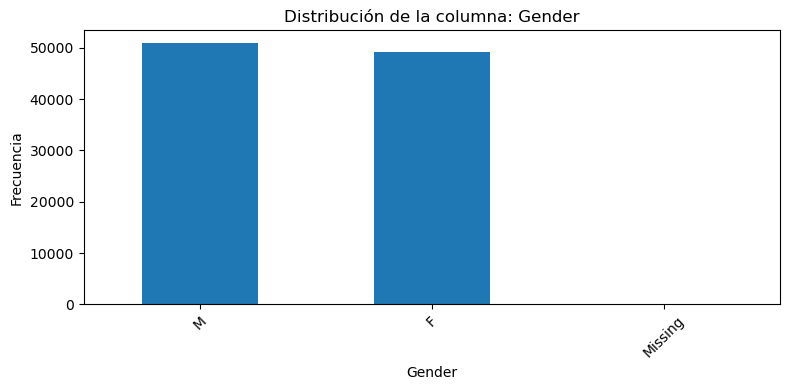

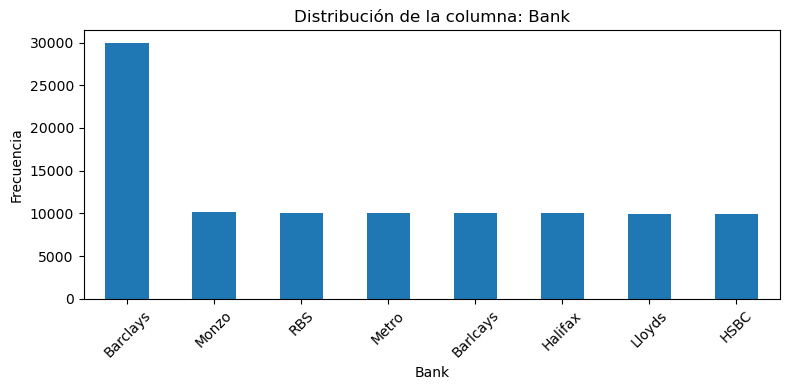

In [20]:
for col in df_categoricas.columns:
    plt.figure(figsize=(8, 4))
    df_categoricas[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribución de la columna: {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#creamos una columna t_internacional con la finalidad si se hace la trasanccion fuera de la region del dueño de la tarjeta

In [21]:
df['t_internacional'] = df['Country of Transaction'] != df['Country of Residence']

In [22]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False


otro factor importante es que podriamos crear una variable r_hora para ver el rango de  horas que se hace la transaccion, segun yo es importante ya que el fraude podria realizarse en la noche y las personas duermen y se cometen más fechorias, 

In [23]:
def clasificar_hora(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['r_hora'] = df['Time'].apply(clasificar_hora)

In [24]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional,r_hora
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,Noche
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,Tarde
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,Tarde
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,Tarde
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True,Noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False,Noche
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False,Noche
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False,Mañana
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False,Noche


In [25]:
df['comparacion_direc'] = df['Shipping Address'] == df['Country of Residence']

In [26]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional,r_hora,comparacion_direc
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,Noche,True
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,Tarde,True
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,Tarde,True
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,Tarde,False
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True,Noche,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False,Noche,True
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False,Noche,True
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False,Mañana,True
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False,Noche,True


antes de entrenar el modelo veremos si hay valores nan ya que apesar que  no hay nulos estos estan rellenados algunos con nan posiblemente

In [27]:
# Contar valores nulos por columna en el DataFrame completo
nan_df = df.isnull().sum()

# Filtrar y mostrar solo las columnas que tienen al menos un NaN
nan_col_df = nan_df[nan_df > 0].sort_values(ascending=False)

# Mostrar resultado
print("Columnas con valores NaN en df (antes del modelado):")
print(nan_col_df)

Columnas con valores NaN en df (antes del modelado):
Series([], dtype: int64)


no hay nan xD

In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  int32  
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  100000 non-null  float64
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          100000 non-null  object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        100000 non-null  object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  100000 non-null  object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [29]:
df['r_hora'] = df['r_hora'].astype(str)

In [30]:
df

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud,t_internacional,r_hora,comparacion_direc
0,3577209,14-Oct-20,Wednesday,19,Visa,Tap,5.0,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0,False,Noche,True
1,3039221,14-Oct-20,Wednesday,17,MasterCard,PIN,288.0,POS,Services,USA,USA,USA,F,49.6,Lloyds,0,False,Tarde,True
2,2694780,14-Oct-20,Wednesday,14,Visa,Tap,5.0,POS,Restaurant,India,India,India,F,42.2,Barclays,0,False,Tarde,True
3,2640960,13-Oct-20,Tuesday,14,Visa,Tap,28.0,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0,False,Tarde,False
4,2771031,13-Oct-20,Tuesday,23,Visa,CVC,91.0,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1,True,Noche,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3203892,13-Oct-20,Tuesday,22,MasterCard,Tap,15.0,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0,False,Noche,True
99996,3304849,14-Oct-20,Wednesday,23,MasterCard,PIN,7.0,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0,False,Noche,True
99997,3532129,13-Oct-20,Tuesday,11,MasterCard,PIN,21.0,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0,False,Mañana,True
99998,3107092,14-Oct-20,Wednesday,22,Visa,Tap,25.0,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0,False,Noche,True


In [31]:
dfx = df[['Amount', 'Age', 't_internacional', 'r_hora', 'comparacion_direc']]


In [32]:
dfx

,Amount,Age,t_internacional,r_hora,comparacion_direc
0,5.0,25.2,False,Noche,True
1,288.0,49.6,False,Tarde,True
2,5.0,42.2,False,Tarde,True
3,28.0,51.0,False,Tarde,False
4,91.0,38.0,True,Noche,False
...,...,...,...,...,...
99995,15.0,53.8,False,Noche,True
99996,7.0,45.0,False,Noche,True
99997,21.0,46.5,False,Mañana,True
99998,25.0,48.2,False,Noche,True


pasamos las columnas t_internacional, r_hora,comparacion_direc a valores numericos ya que son datos importantes 

In [33]:
# Codificar booleanos a 0 y 1
dfx['t_internacional'] = dfx['t_internacional'].astype(int)
dfx['comparacion_direc'] = dfx['comparacion_direc'].astype(int)

# Codificar r_hora (Noche, Tarde, Mañana) a valores numéricos
mapa_hora = {'Mañana': 0, 'Tarde': 1, 'Noche': 2}
dfx['r_hora'] = dfx['r_hora'].map(mapa_hora)

C:\Users\nicolás\AppData\Local\Temp\ipykernel_8904\2232074192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['t_internacional'] = dfx['t_internacional'].astype(int)
C:\Users\nicolás\AppData\Local\Temp\ipykernel_8904\2232074192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['comparacion_direc'] = dfx['comparacion_direc'].astype(int)
C:\Users\nicolás\AppData\Local\Temp\ipykernel_8904\2232074192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [34]:
dfx

,Amount,Age,t_internacional,r_hora,comparacion_direc
0,5.0,25.2,0,2.0,1
1,288.0,49.6,0,1.0,1
2,5.0,42.2,0,1.0,1
3,28.0,51.0,0,1.0,0
4,91.0,38.0,1,2.0,0
...,...,...,...,...,...
99995,15.0,53.8,0,2.0,1
99996,7.0,45.0,0,2.0,1
99997,21.0,46.5,0,0.0,1
99998,25.0,48.2,0,2.0,1


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [36]:
X = dfx.copy()  
y = df['Fraud']   # Variable objetivo

#Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

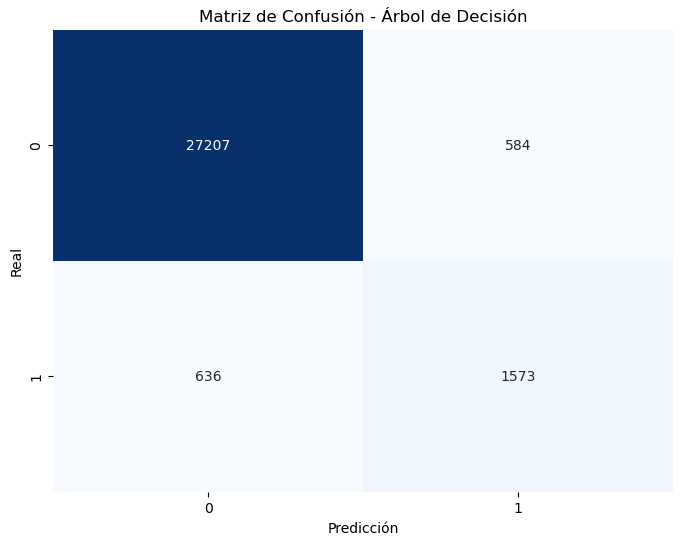

Accuracy: 0.9593333333333334

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27791
           1       0.73      0.71      0.72      2209

    accuracy                           0.96     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [38]:
#Inicializar el modelo
tree_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)

#Entrenar el modelo
tree_model.fit(x_train, y_train)

#Predecir con los datos de prueba
y_pred1 = tree_model.predict(x_test)

#Matriz de confusión
cm = confusion_matrix(y_test, y_pred1)

#Visualización de la matriz
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()

#Evaluar el rendimiento
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred1))

In [39]:
print("Métricas para todas las clases:\n")
print(classification_report(y_test, y_pred1, target_names=['Legítima', 'Fraude']))

Métricas para todas las clases:

              precision    recall  f1-score   support

    Legítima       0.98      0.98      0.98     27791
      Fraude       0.73      0.71      0.72      2209

    accuracy                           0.96     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.96      0.96      0.96     30000



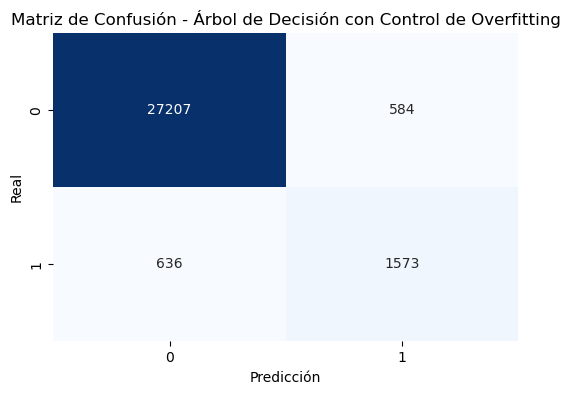

Accuracy: 0.9593333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27791
           1       0.73      0.71      0.72      2209

    accuracy                           0.96     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.96      0.96      0.96     30000



In [40]:
# Inicializar el modelo con parámetros que previenen overfitting
tree_model1 = DecisionTreeClassifier(
    max_depth=5,                # Limita la profundidad
    min_samples_split=30,       # Mínimas muestras para dividir
    min_samples_leaf=10,        # Mínimas muestras en hoja
    max_leaf_nodes=20,          # Máximo de nodos hoja
    class_weight='balanced',    # Ajuste por desbalanceo
    random_state=42
)

# Entrenar el modelo
tree_model1.fit(x_train, y_train)

# Predecir
y_pred2 = tree_model.predict(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Árbol de Decisión con Control de Overfitting")
plt.show()

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))


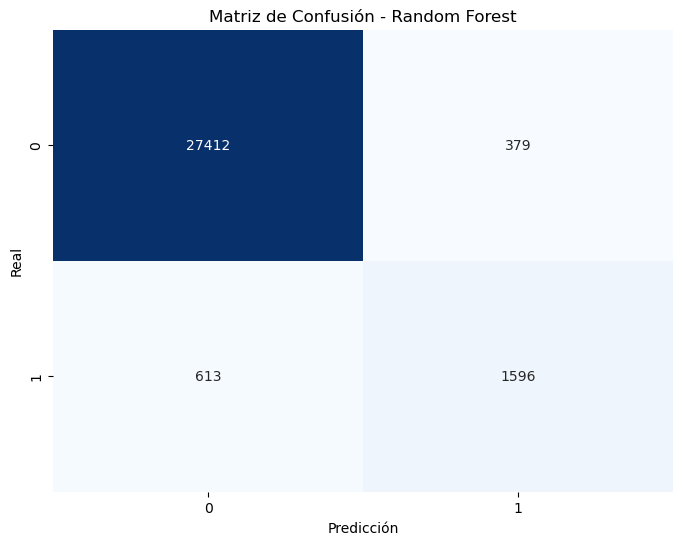

Accuracy (Random Forest): 0.9669333333333333

Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     27791
           1       0.81      0.72      0.76      2209

    accuracy                           0.97     30000
   macro avg       0.89      0.85      0.87     30000
weighted avg       0.97      0.97      0.97     30000



In [41]:
from sklearn.ensemble import RandomForestClassifier

# Crear modelo Random Forest SIN control de overfitting
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(x_train, y_train)


y_pred_rf = rf_model1.predict(x_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

# Métricas de evaluación
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))


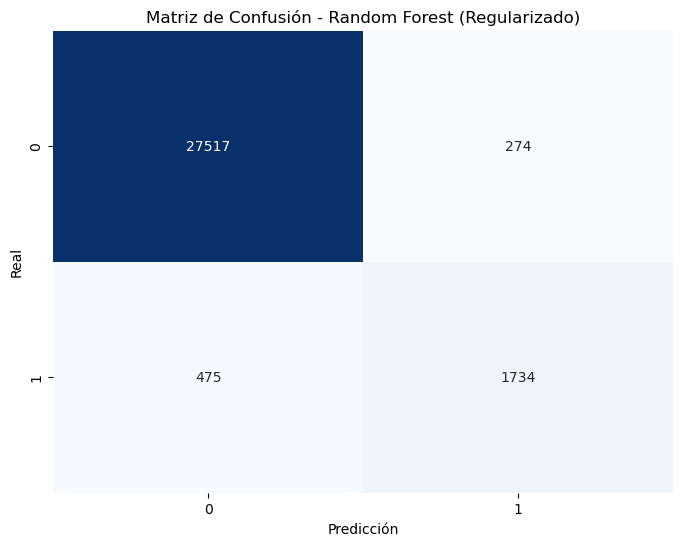

Accuracy (RF con control de overfitting): 0.9750333333333333

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27791
           1       0.86      0.78      0.82      2209

    accuracy                           0.98     30000
   macro avg       0.92      0.89      0.90     30000
weighted avg       0.97      0.98      0.97     30000



In [42]:

# Modelo con control de sobreajuste
rf_model = RandomForestClassifier(
    n_estimators=100,         
    max_depth=10,             
    min_samples_split=10,     
    min_samples_leaf=5,       
    max_features='sqrt',      
    random_state=42
)

# Entrenamiento
rf_model.fit(x_train, y_train)

# Predicción
y_pred_rf1 = rf_model.predict(x_test)

# Matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf1)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest (Regularizado)')
plt.show()

# Métricas
print("Accuracy (RF con control de overfitting):", accuracy_score(y_test, y_pred_rf1))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf1))

In [43]:
# Crear diccionario de métricas
metricas_modelos = {
    'Árbol sin control': {
        'Accuracy': accuracy_score(y_test, y_pred1),
        'Precision': classification_report(y_test, y_pred1, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred1, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred1, output_dict=True)['1']['f1-score'],
    },
    'Árbol con control': {
        'Accuracy': accuracy_score(y_test, y_pred2),
        'Precision': classification_report(y_test, y_pred2, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred2, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred2, output_dict=True)['1']['f1-score'],
    },
    'RF sin control': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
    },
    'RF con control': {
        'Accuracy': accuracy_score(y_test, y_pred_rf1),
        'Precision': classification_report(y_test, y_pred_rf1, output_dict=True)['1']['precision'],
        'Recall': classification_report(y_test, y_pred_rf1, output_dict=True)['1']['recall'],
        'F1-score': classification_report(y_test, y_pred_rf1, output_dict=True)['1']['f1-score'],
    }
}

In [44]:
df_metricas = pd.DataFrame(metricas_modelos).T

In [45]:
df_metricas

,Accuracy,Precision,Recall,F1-score
Árbol sin control,0.959333,0.729254,0.712087,0.720568
Árbol con control,0.959333,0.729254,0.712087,0.720568
RF sin control,0.966933,0.808101,0.722499,0.762906
RF con control,0.975033,0.863546,0.784971,0.822386


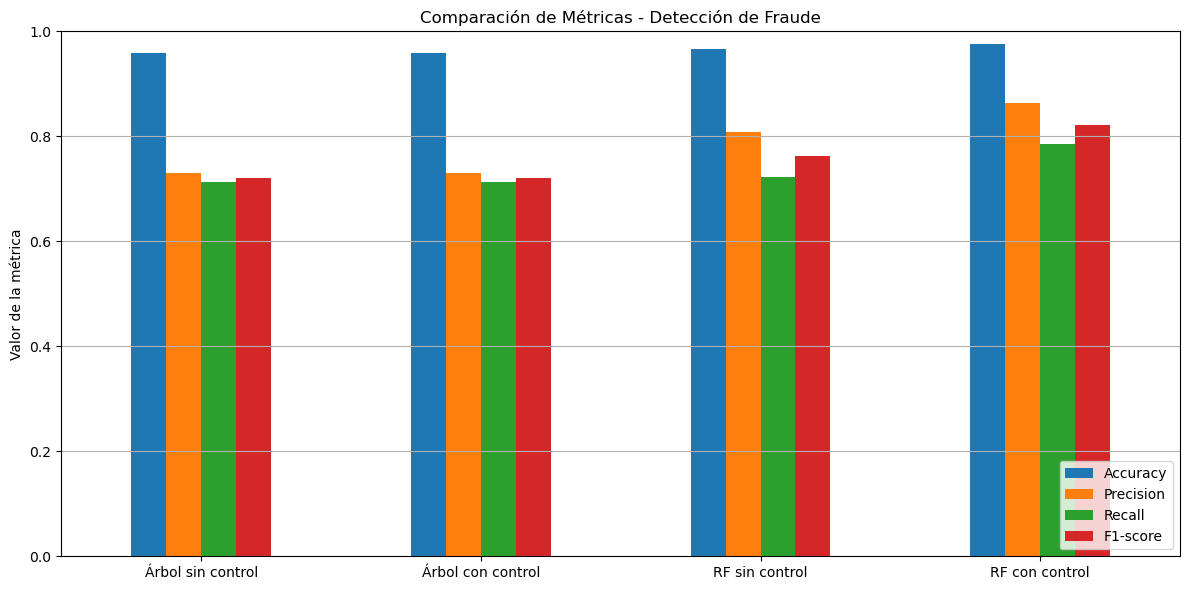

In [46]:
df_metricas.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas - Detección de Fraude')
plt.ylabel('Valor de la métrica')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [47]:
models = {
    'arbol sin control': tree_model,
    'arbol con control': tree_model1,
    'random forest sin control': rf_model1,
    'random forest con control': rf_model,
}

In [48]:
from sklearn.metrics import roc_auc_score

auc_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]  # Probabilidad de fraude
    auc_score = roc_auc_score(y_test, y_score)
    auc_scores[model_name] = auc_score
    print(f'AUC de {model_name}: {auc_score:.2f}')


AUC de arbol sin control: 0.84
AUC de arbol con control: 0.99
AUC de random forest sin control: 0.97
AUC de random forest con control: 0.99


In [50]:
from sklearn.metrics import roc_curve, auc

<Figure size 1000x800 with 0 Axes>

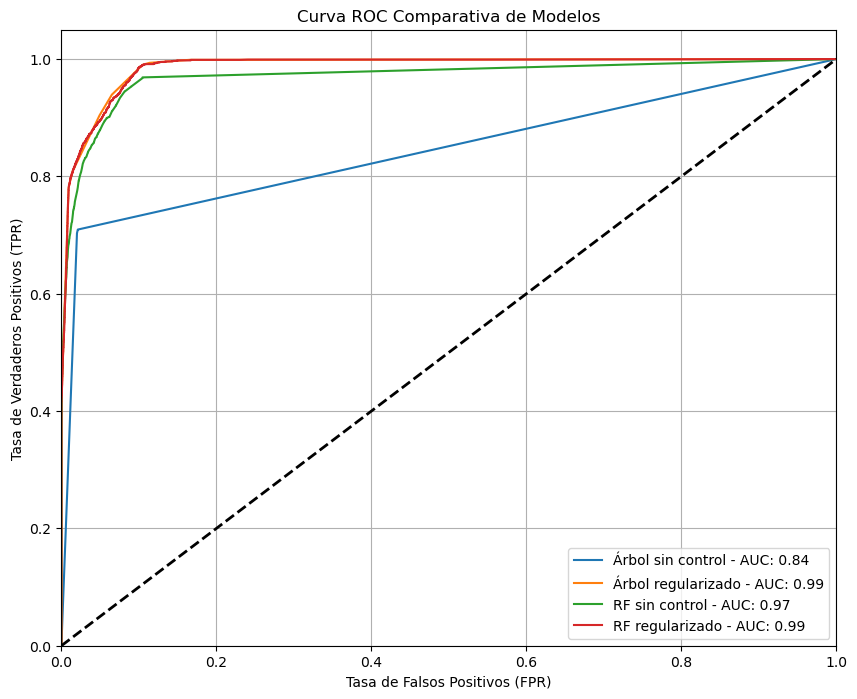

In [ ]:
plt.figure(figsize=(10, 8))

modelos = {
    'Árbol sin control': tree_model,
    'Árbol con control': tree_model1,
    'RF sin control': rf_model1,
    'RF con control': rf_model
}

for nombre, modelo in modelos.items():
    # Obtener probabilidad para clase 1 (fraude)
    y_score = modelo.predict_proba(X_test)[:, 1]
    
    # Calcular FPR, TPR y AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    
    # Graficar
    plt.plot(fpr, tpr, label=f'{nombre} - AUC: {auc_score:.2f}')

# Línea base
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa de Modelos')
plt.legend(loc='lower right')
plt.grid()
plt.show()